# The multiindex pandas array

In [1]:
# This only adds the package to the path.
import os
import sys 
sys.path.insert(0, '../../')

import icenumerics as ice

import matplotlib.pyplot as plt
%matplotlib inline

ureg = ice.ureg

sp = ice.spins()
sp.create_lattice("square",[10,10],lattice_constant=30*ureg.um, border="closed spin")
                  
particle = ice.particle(radius = 5.15*ureg.um,
             susceptibility = 0.0576,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 80*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

col = ice.colloidal_ice(sp, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(30*ureg.um)

world = ice.world(
    field = 10*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

col.simulation(world,
             name = "test",
             include_timestamp = False,
             targetdir = r".",
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = 60*ureg.s,
             output = ["x","y","z"])

col.run_simulation()
col.load_simulation()

scanning file


  0%|          | 0/559048 [00:00<?, ?it/s]

## Simulation trajectories as Pandas Array

We can access the full trajectories of the particles, which are stored as a multiindex `pandas` array in the `trj` attribute. To access it, we can simply write 
    
    col.trj
    
Below we use the method `head()`, which prints only the first few rows of a pandas array. This is useful to visualize the structure of an array. 

In [2]:
col.trj.head()

type      x    y    z    t
frame id                            
0     1      1   20.0  0.0  0.0  0.0
      2      1   50.0  0.0  0.0  0.0
      3      1   80.0  0.0  0.0  0.0
      4      1  110.0  0.0  0.0  0.0
      5      1  140.0  0.0  0.0  0.0

## The multiindex pandas array

The multiindex structure is a little complicated to access at first, but it allows a lot of flexibility when slicing sections of the array. It is also the natural structure for a system of many particles and many frames. Here we show how to easily slice sections of the array. 

The first step is to define an IndexSlice object from the pandas module.

In [3]:
import pandas as pd
idx = pd.IndexSlice

Then, if for example we want to access the tenth frame we write:

In [4]:
col.trj.loc[idx[10,:],:].head()

type           x         y    z     t
frame id                                       
10    1      1    9.924750 -0.462240  0.0  10.0
      2      1   48.161800 -0.351019  0.0  10.0
      3      1   74.628502 -0.314665  0.0  10.0
      4      1  102.295998 -0.320552  0.0  10.0
      5      1  136.949005 -0.366245  0.0  10.0

and we can plot the points by writing:

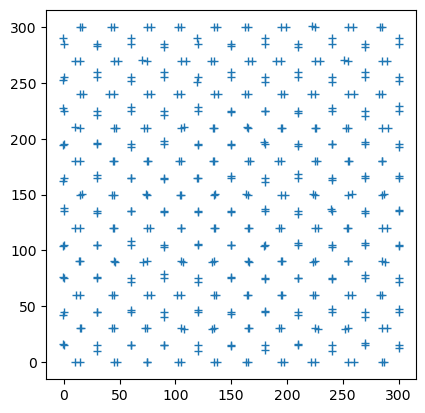

In [5]:
plt.plot(col.trj.loc[idx[10,:],"x"],col.trj.loc[idx[10,:],"y"],'+')
plt.axis("square");

### The type column

The simulation program defines traps as a type of atom. Therefore, in the resulting array, we see two atoms per `colloidal_ice` element, which are distinguished by their `type`, as can be seen in the previous image. To access only the atoms, we can use the nice logical indexing features of the pandas array.

In [6]:
trj_particle = col.trj[col.trj.type==1]
trj_particle.head()

type      x    y    z    t
frame id                            
0     1      1   20.0  0.0  0.0  0.0
      2      1   50.0  0.0  0.0  0.0
      3      1   80.0  0.0  0.0  0.0
      4      1  110.0  0.0  0.0  0.0
      5      1  140.0  0.0  0.0  0.0

And we can plot the points by writing, as before:

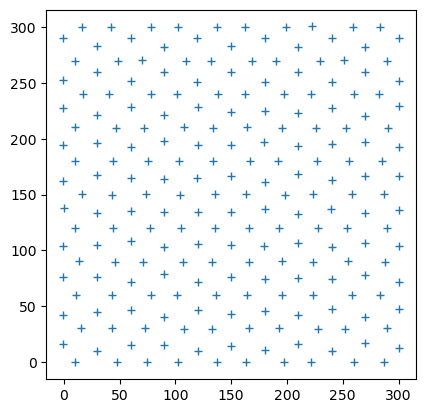

In [7]:
plt.plot(trj_particle.loc[idx[10,:],"x"],trj_particle.loc[idx[10,:],"y"],'+')
plt.axis("square");

### Drawing whole trajectories
We can plot the trajectories of the particles by writing:

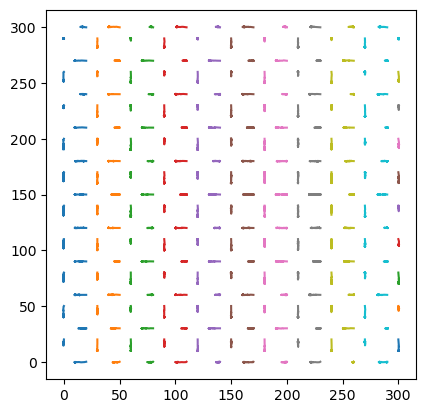

In [8]:
for i in trj_particle.index.get_level_values("id").unique():
    plt.plot(trj_particle.loc[idx[:,i],"x"],trj_particle.loc[idx[:,i],"y"])
plt.axis("square");